Importando Bibliotecas

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error

Lendo o arquivo e visualizando os dados

In [54]:
df = pd.read_csv('cartoes.csv')
df.head()

,Limit,Score
0,3606,283
1,6645,483
2,7075,514
3,9504,681
4,4897,357


Estudando o DataFrame

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Limit   400 non-null    int64
 1   Score   400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [56]:
df.describe()

,Limit,Score
count,400.000000,400.000000
mean,4735.600000,354.940000
std,2308.198848,154.724143
min,855.000000,93.000000
25%,3088.000000,247.250000
50%,4622.500000,344.000000
75%,5872.750000,437.250000
max,13913.000000,982.000000


Plotando os dados

[]

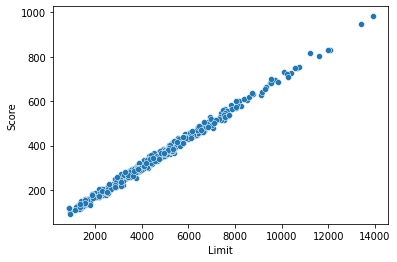

In [57]:
sns.scatterplot(data = df, x = 'Limit', y = 'Score')
plt.plot()

Verificando Correlação

In [58]:
correlacao, p_value = pearsonr(df['Limit'], df['Score'])

if p_value <= 0.01:
  print('Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta')
else:
  print('Aceita H0, ou seja, os nossos dados NÃO possuem uma correlação alta')

Rejeita a hipótese H0, ou seja, os nossos dados possuem uma correlação alta


In [59]:
correlacao

0.9968797370016825

In [60]:
df.corr()

,Limit,Score
Limit,1.00000,0.99688
Score,0.99688,1.00000


Criando modelo

In [61]:
x = df['Limit']
y = df['Score']
lr = LinearRegression()

lr.fit(x.values.reshape(-1, 1), y.values) 
y_est = lr.predict(x.values.reshape(-1, 1))

Plotando reta do modelo

<AxesSubplot:xlabel='Limit', ylabel='Score'>

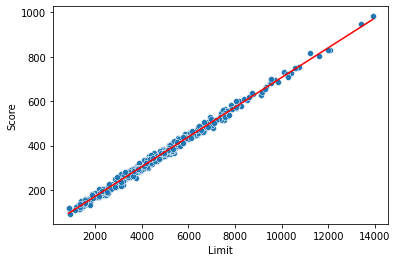

In [62]:
sns.scatterplot(x = x, y = y)
sns.lineplot(x = x, y = y_est, color='red')

Analisando o modelo

In [63]:
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        10:37:57   Log-Likelihood:                -1568.1
No. Observations:                 400   AIC:                             3140.
Df Residuals:                     398   BIC:                             3148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4918      1.397     27.555      0.000      35.746      41.238
Limit          0.0668      0.000    251.949      0.000       0.066       0.067
==============================================================================
Omnibus:                        7.074   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.177
Skew:                           0.155   Prob(JB):                       0.0751
Kurtosis:                       2.537   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Marcos Peixoto\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score'>

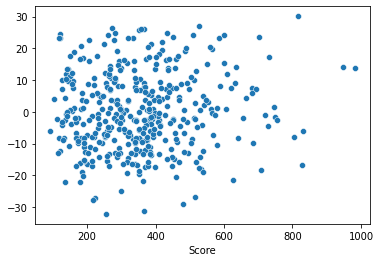

In [64]:
sns.scatterplot(y, model.resid)

R-Quadrado

In [65]:
r2_score(y, y_est)

0.9937692100445441

MAE

In [66]:
MAE(y, y_est)

9.938589564239681

MSE

In [67]:
MSE(y, y_est)

148.7894659303055

RMSE

In [69]:
np.sqrt(MSE(y, y_est))

12.197928755748064

RMSLE

In [70]:
np.sqrt(mean_squared_log_error(y, y_est))

0.04654725882368761